In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte

In [4]:
df=pd.read_csv("/content/drive/MyDrive/AI & ML/laptop_price.csv",encoding='latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.drop(columns=['laptop_ID'],inplace=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.duplicated().sum()

28

In [ ]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1275, 12)

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
179,HP,Spectre x360,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29kg,1499.0


In [ ]:
df['Price']=(df['Price_euros']*90.96).apply(lambda a: int(a))

In [ ]:
df=df.drop(columns=['Price_euros'])

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
583,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,139840


In [ ]:
# EDA
# - Univariate Analysis
# - Multi-Variate Analysis

In [ ]:
# Company Column
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [ ]:
plt.rcParams['figure.figsize']=[6,3.5]  # The default setting for entire notebook
# plt.figure(figsize=(10,8)) # individual graphs

<Axes: xlabel='Company'>

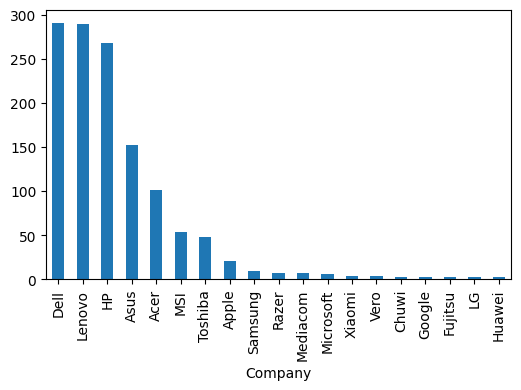

In [ ]:
df['Company'].value_counts().plot(kind='bar')

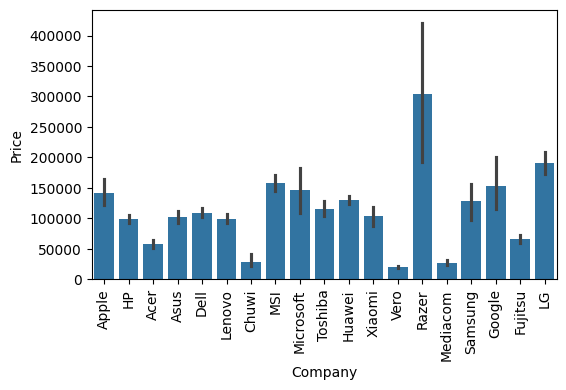

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df=df[df.groupby('Company').Company.transform('count')>10]

In [ ]:
df.shape

(1224, 12)

In [ ]:
df=df.reset_index(drop=True)

<Axes: xlabel='Company'>

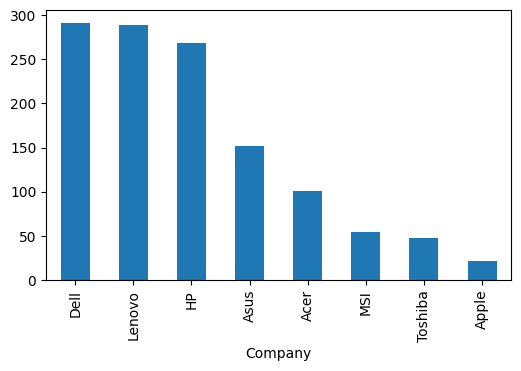

In [ ]:
df['Company'].value_counts().plot(kind='bar')

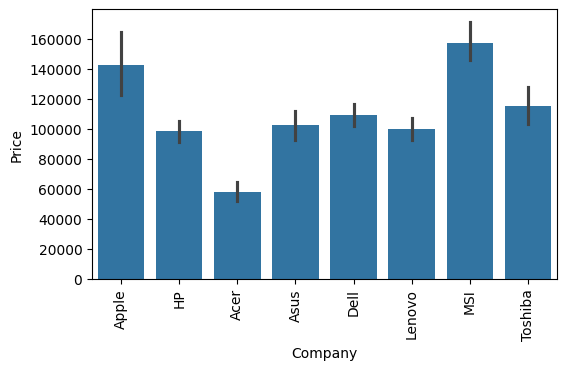

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Product'].value_counts()

Product
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Legion Y520-15IKBN                     19
Vostro 3568                            19
                                       ..
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
Portege X30-D-10L                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: count, Length: 589, dtype: int64

In [ ]:
df=df.drop(columns=['Product'])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
124,Asus,Notebook,14.0,1366x768,AMD E-Series 6110 1.5GHz,4GB,64GB SSD,AMD Radeon R2,Windows 10 S,1.65kg,25285


In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              688
Gaming                200
Ultrabook             171
2 in 1 Convertible    114
Workstation            29
Netbook                22
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

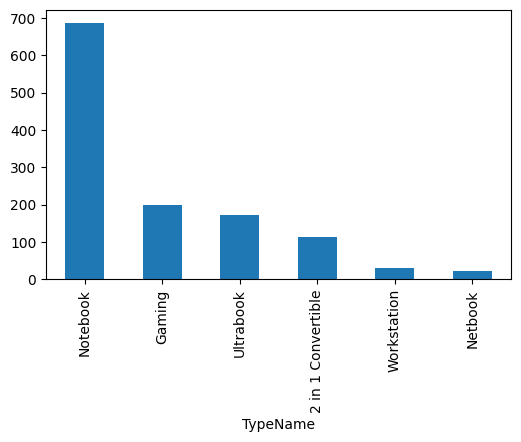

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

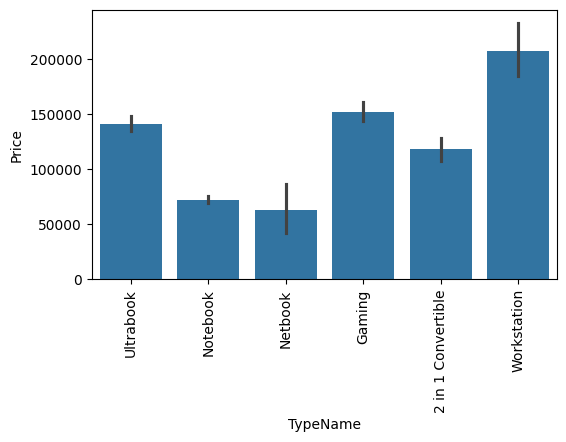

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Inches'].value_counts()

Inches
15.6    637
14.0    182
17.3    162
13.3    152
12.5     37
11.6     29
12.0      6
13.9      6
15.4      4
10.1      4
18.4      1
17.0      1
14.1      1
11.3      1
15.0      1
Name: count, dtype: int64

<Axes: xlabel='Inches'>

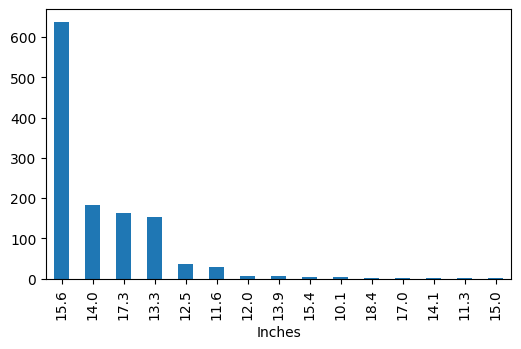

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

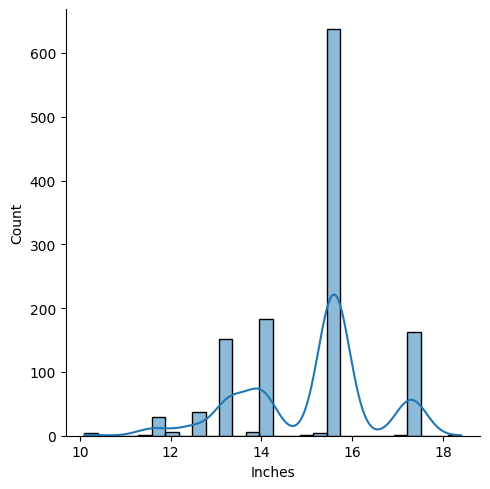

In [ ]:
sns.displot(x=df['Inches'],kde=True)

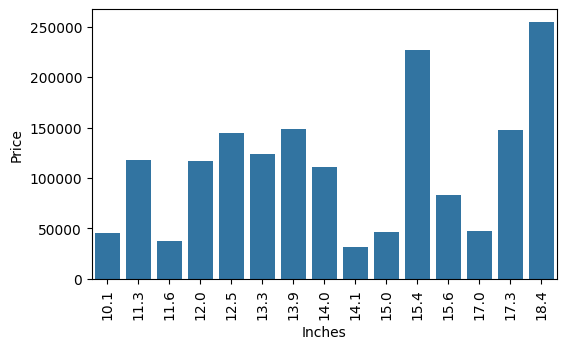

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                492
1366x768                                         258
IPS Panel Full HD 1920x1080                      217
IPS Panel Full HD / Touchscreen 1920x1080         48
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200                    4
1440x900                     

In [ ]:
# X_res  : horizontal pixels
# Y_res  : vertical pixels
# IPS    : IPS panel or not
# Touchscreen : Touchscreen or not

In [ ]:
(lambda x:1 if "IPS" in x else 0)(" Panel Full HD /  1920x1080")

0

In [ ]:
df['X_res']=df['ScreenResolution'].apply(lambda a: a.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda a: a.split()[-1].split('x')[1]).astype('int')
df['Touchscreen']=df['ScreenResolution'].apply(lambda a: 1 if 'Touchscreen' in a else 0).astype('int')
df['IPS']=df['ScreenResolution'].apply(lambda a: 1 if 'IPS' in a else 0).astype('int')

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
1153,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.2kg,243772,3200,1800,1,0


In [ ]:
df=df.drop(columns=['ScreenResolution'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
94,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,54566,1920,1080,0,0


In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     124
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 2.9GHz             1
Intel Atom x5-Z8350 1.44GHz      1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 111, dtype: int64

In [ ]:
df['Cpu']=df['Cpu'].apply(lambda a : ' '.join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i7               493
Intel Core i5               411
Intel Core i3               134
Intel Celeron Dual           66
Intel Pentium Quad           27
Intel Core M                 16
AMD A9-Series 9420           12
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9600P          2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD E-Series 9000e            1
AMD Ryzen 1600                1
AMD E-Series 6110             1
AMD FX 9830P                  1
AMD E-Series E2-6110          1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD 

In [ ]:
def processor(a):
  if a=='Intel Core i7' or a=='Intel Core i5' or a=='Intel Core i3' or a=='Intel Core M':
    return a
  elif a.split()[0]=='Intel':
    return ' '.join(a.split()[0:2])
  else:
    return 'AMD Processor'

In [ ]:
df['Cpu']=df['Cpu'].apply(processor)

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i7    493
Intel Core i5    411
Intel Core i3    134
Intel Celeron     71
AMD Processor     60
Intel Pentium     30
Intel Core M      16
Intel Atom         5
Intel Xeon         4
Name: count, dtype: int64

<Axes: xlabel='Cpu'>

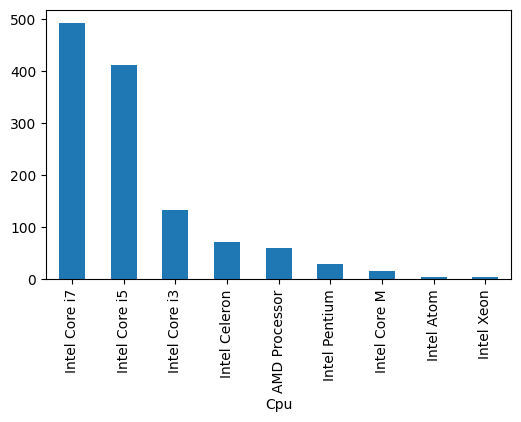

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

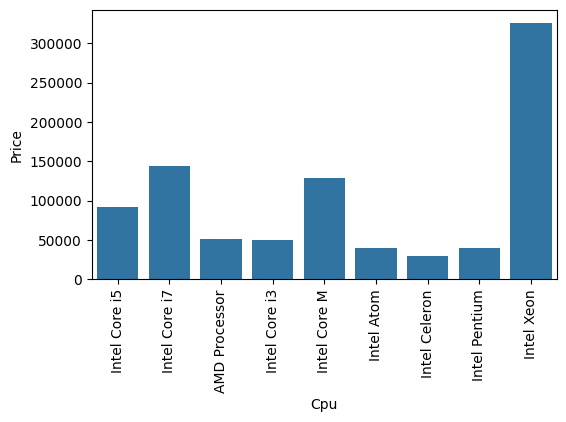

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Ram'].value_counts()

Ram
8GB     595
4GB     351
16GB    186
6GB      34
12GB     25
32GB     15
2GB      14
24GB      3
64GB      1
Name: count, dtype: int64

In [ ]:
df['Ram']=df['Ram'].apply(lambda a:a.replace("GB","")).astype('int')

In [ ]:
df['Ram'].value_counts()

Ram
8     595
4     351
16    186
6      34
12     25
32     15
2      14
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='Ram'>

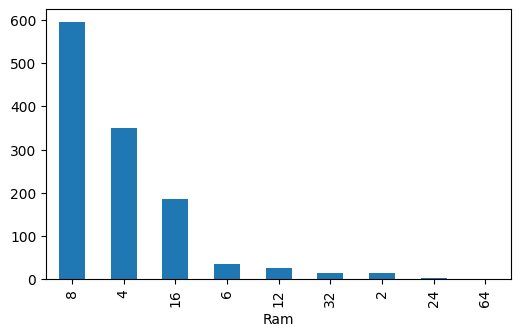

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

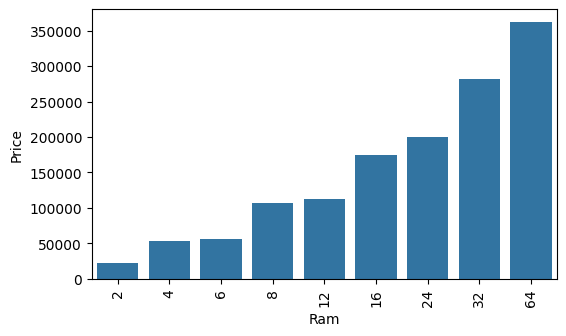

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        393
1TB HDD                          214
500GB HDD                        124
512GB SSD                        105
128GB SSD +  1TB HDD              93
256GB SSD +  1TB HDD              73
128GB SSD                         71
32GB Flash Storage                29
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           12
64GB Flash Storage                10
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD         

In [ ]:
# -- Due to complexity in handling various storage options, we will skip the memory column

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      265
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     65
Nvidia GeForce GTX 1060     45
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: count, Length: 108, dtype: int64

In [ ]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel     666
Nvidia    385
AMD       173
Name: count, dtype: int64

<Axes: xlabel='Gpu'>

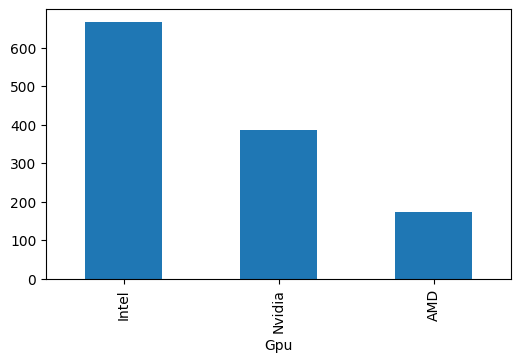

In [ ]:
df['Gpu'].value_counts().plot(kind='bar')

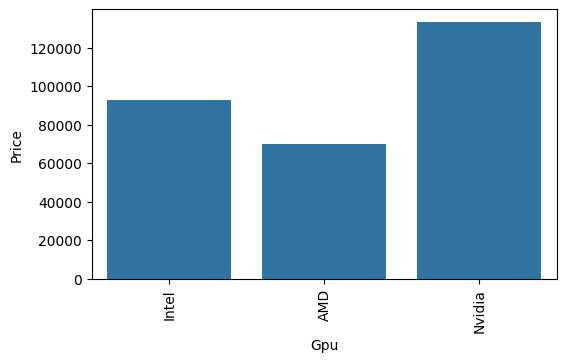

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1011
No OS             63
Linux             58
Windows 7         45
Chrome OS         22
macOS             13
Mac OS X           8
Android            2
Windows 10 S       2
Name: count, dtype: int64

In [ ]:
def fetch_os(text):
  if text=="Windows 10" or text=="Windows 10 S":
    return "Windows 10"
  elif text=="Windows 7":
    return text
  elif text=="Mac OS X" or text=="macOS":
    return "Mac OS"
  else:
    return "Linux/No OS/Others"

In [ ]:
df['OpSys']=df['OpSys'].apply(fetch_os)

In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10            1013
Linux/No OS/Others     145
Windows 7               45
Mac OS                  21
Name: count, dtype: int64

<Axes: xlabel='OpSys'>

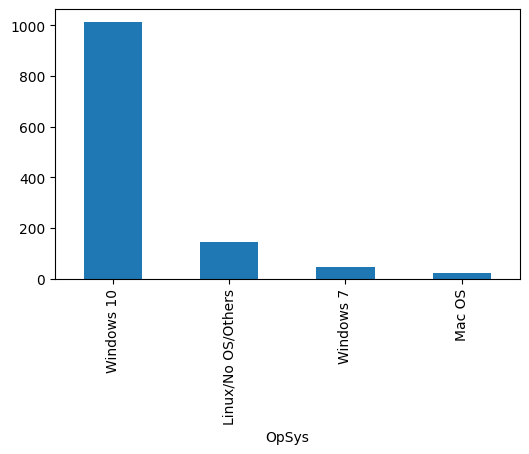

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

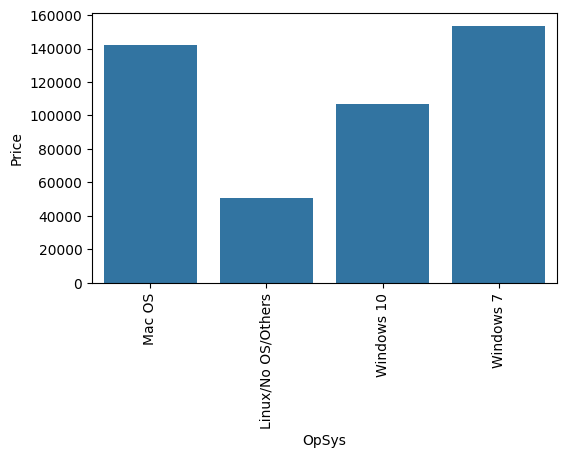

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1219     1.8kg
1220     1.3kg
1221     1.5kg
1222    2.19kg
1223     2.2kg
Name: Weight, Length: 1224, dtype: object

In [ ]:
df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

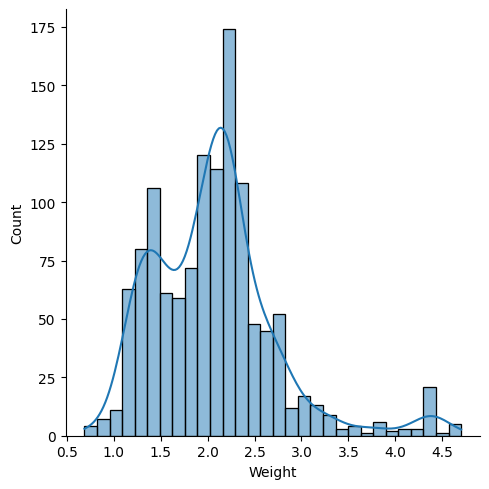

In [ ]:
sns.displot(x=df['Weight'],kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

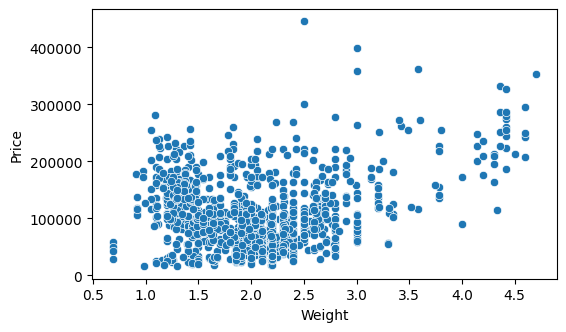

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df['Touchscreen'].value_counts()

Touchscreen
0    1055
1     169
Name: count, dtype: int64

<Axes: xlabel='Touchscreen'>

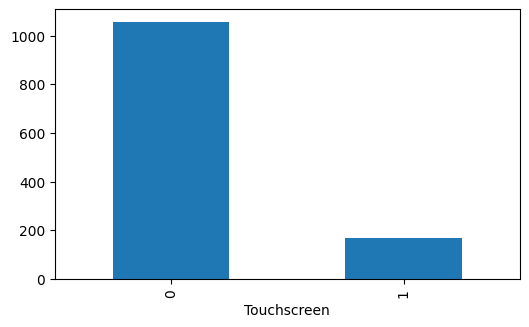

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

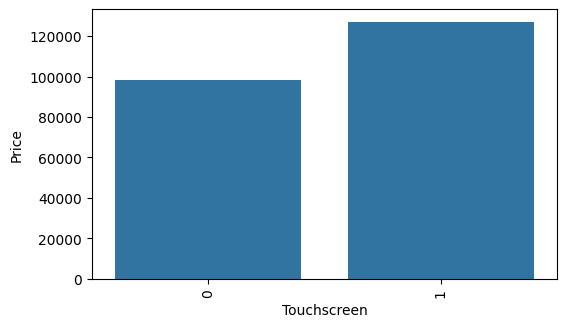

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='IPS'>

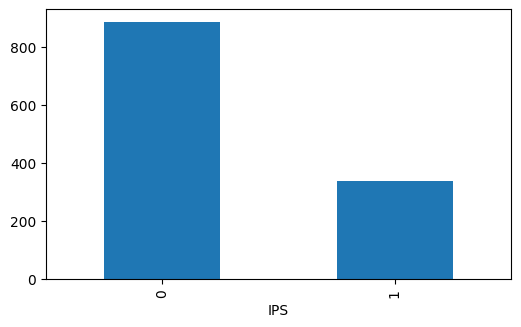

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

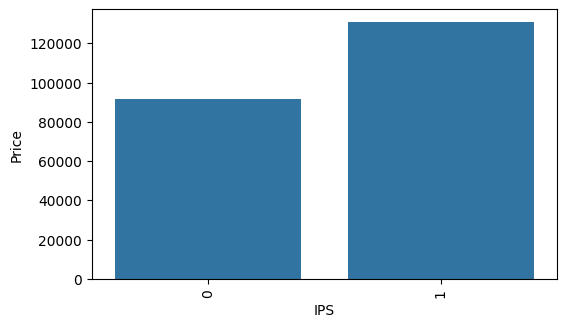

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X_res,Y_res,Touchscreen,IPS
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.359497,-0.104090
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.094037,0.223322
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,-0.291506,0.038753
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.161443,0.289226
X_res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.320954,0.283969
Y_res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.317174,0.294360
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,1.000000,0.154500
IPS,-0.104090,0.223322,0.038753,0.289226,0.283969,0.294360,0.154500,1.000000


In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
Name: Price, dtype: float64

In [ ]:
df['ppi']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('int')

In [ ]:
df['ppi']

0       227
1       128
2       141
3       221
4       227
       ... 
1219    157
1220    276
1221    112
1222    100
1223    100
Name: ppi, Length: 1224, dtype: int64

In [ ]:
df.corr(numeric_only=True)['Price']

Inches         0.055330
Ram            0.726639
Weight         0.212038
Price          1.000000
X_res          0.553707
Y_res          0.552964
Touchscreen    0.161443
IPS            0.289226
ppi            0.483821
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df['ppi'].value_counts()

ppi
141    419
100    195
127    131
157    122
166    100
112     42
135     28
176     25
276     25
282     23
106     22
210     18
125      9
118      8
331      7
227      6
226      6
221      6
255      5
128      4
224      4
158      4
317      2
170      2
91       2
352      2
190      1
108      1
120      1
111      1
195      1
235      1
147      1
Name: count, dtype: int64

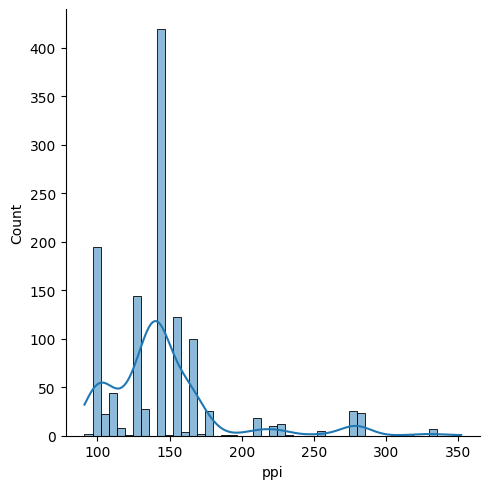

In [ ]:
sns.displot(x=df['ppi'],kde=True)

<Axes: xlabel='ppi', ylabel='Price'>

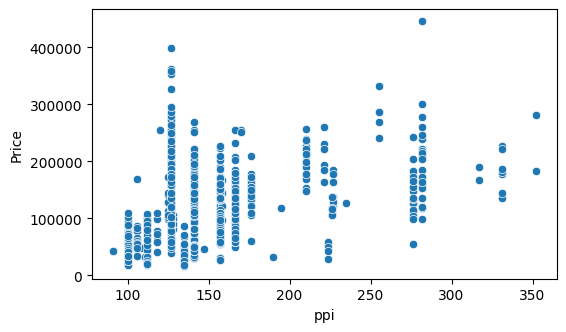

In [ ]:
sns.scatterplot(x=df['ppi'],y=df['Price'])

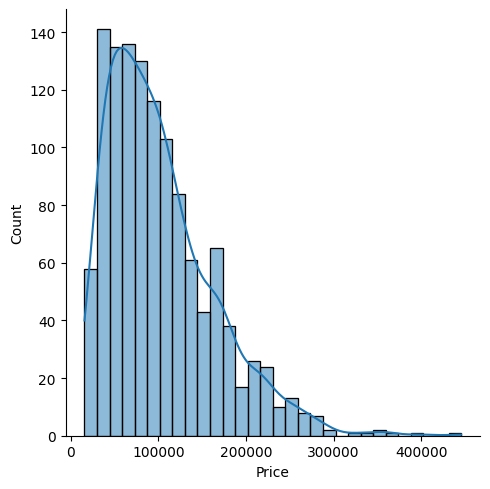

In [ ]:
sns.displot(x=df['Price'],kde=True)
plt.show()

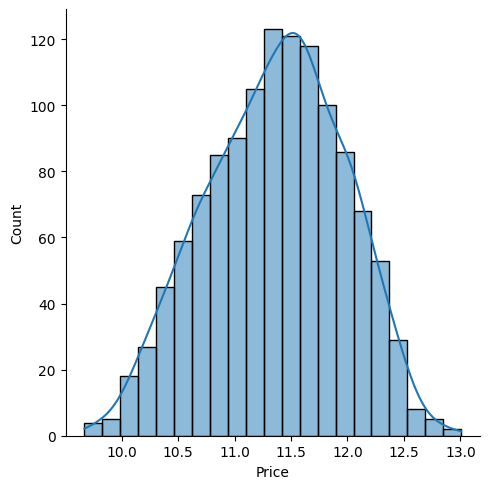

In [ ]:
sns.displot(x=np.log(df['Price']),kde=True)
plt.show()

In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
X.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227
1,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.34,0,0,128
2,HP,Notebook,Intel Core i5,8,Intel,Linux/No OS/Others,1.86,0,0,141
3,Apple,Ultrabook,Intel Core i7,16,AMD,Mac OS,1.83,0,1,221
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227


In [ ]:
X_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
240,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227
439,Lenovo,Notebook,Intel Core i5,8,Intel,Windows 10,1.65,0,0,157
192,Dell,Gaming,Intel Core i7,16,Nvidia,Windows 10,2.65,0,1,282
218,Asus,Notebook,Intel Core i5,8,Nvidia,Windows 10,2.00,0,0,141
184,Dell,Notebook,Intel Core i7,8,AMD,Windows 10,2.80,0,0,127


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7849854828706778
MAE: 0.20009186638712761
MSE: 0.0678906670648767


In [ ]:
# Lasso
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7924904607933325
MAE: 0.19507784204024442
MSE: 0.06552097610503446


In [ ]:
# Ridge
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7903096605004571
MAE: 0.19670526373209835
MSE: 0.06620956210655334


In [ ]:
# KNeighborsRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7859697023952642
MAE: 0.1926773629893376
MSE: 0.06757990051313613


In [ ]:
# DecisionTreeRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8175162169722028
MAE: 0.18284147714653634
MSE: 0.05761911299611437


In [ ]:
# SVR
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8144162220880313
MAE: 0.1811312900754648
MSE: 0.05859793397710663


In [ ]:
# RandomForestRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8668376186582676
MAE: 0.15652416963674481
MSE: 0.04204591865673997


In [ ]:
# AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8048610516638054
MAE: 0.19672495186997577
MSE: 0.061614971629634585


In [ ]:
# XGBRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=50,max_depth=4)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8775469222718489
MAE: 0.14592216222317725
MSE: 0.03866446434456888


In [ ]:
# GradientBoostingRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=300)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8803530765600155
MAE: 0.14428720271695927
MSE: 0.037778423303925994


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
# %%writefile app.py
# import streamlit as st
# import pickle
# import numpy as np

# df=pickle.load(open('df.pkl','rb'))
# pipe=pickle.load(open('pipe.pkl','rb'))

# st.title("Laptop Price Predictor")
# company=st.selectbox("Brand",df['Company'].unique(),index=4)
# type=st.selectbox("Type",df['TypeName'].unique(),index=1)
# cpu=st.selectbox("Processor",df['Cpu'].unique(),index=0)
# ram=st.selectbox("RAM(in GB)",[2,4,6,8,12,16,24,32,64,128],index=3)
# gpu=st.selectbox("GPU",df['Gpu'].unique(),index=0)

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load the data and model
df = pickle.load(open('df.pkl', 'rb'))
pipe = pickle.load(open('pipe.pkl', 'rb'))

st.title("Laptop Price Predictor")

# Dropdowns for selecting laptop specifications
company = st.selectbox("Brand", df['Company'].unique(), index=0)
laptop_type = st.selectbox("Type", df['TypeName'].unique(), index=0)
cpu = st.selectbox("Processor", df['Cpu'].unique(), index=0)
ram = st.selectbox("RAM (in GB)", [2, 4, 6, 8, 12, 16, 24, 32, 64, 128], index=3)
gpu = st.selectbox("GPU", df['Gpu'].unique(), index=0)
opsys = st.selectbox("Operating System", df['OpSys'].unique(), index=0)
weight = st.number_input("Weight (in kg)", value=1.5, step=0.01)
touchscreen = st.radio("Touchscreen", ['Yes', 'No'])
ips = st.radio("IPS Display", ['Yes', 'No'])
ppi = st.number_input("PPI (Pixels Per Inch)", value=100)

# Convert touchscreen and IPS display to binary
touchscreen = 1 if touchscreen == 'Yes' else 0
ips = 1 if ips == 'Yes' else 0

# Predicting the price when "Predict" button is clicked
if st.button("Predict"):
    input_data = np.array([[company, laptop_type, cpu, ram, gpu, opsys, weight, touchscreen, ips, ppi]])
    predicted_price = pipe.predict(input_data)[0]
    st.success(f"The predicted price of the laptop is ${predicted_price:.2f}")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.118.221:8501

npx: installed 22 in 4.936s
your url is: https://pink-worms-deny.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
